# 군집화(Clustering)
- 비지도학습으로 정답없이 특징만 가지고, 보유한 데이터로 모델을 구현

In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
df = pd.read_csv("../Data/student_kmeans.csv")
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


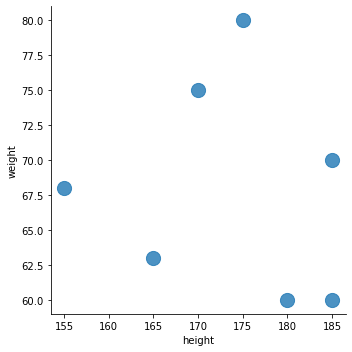

In [7]:
# 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    'height',
    'weight',
    data=df,
    fit_reg=False,
    scatter_kws={'s':200}

)

plt.show()

### k_means 군집화

In [9]:
df.values

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]])

In [11]:
from sklearn.cluster import KMeans
data_points = df.values
kmeans = KMeans(
    n_clusters=3
).fit(data_points)


In [13]:
# 각 군집의 중심위치
kmeans.cluster_centers_ # 뒤에 언더바가 있으면 시스템에서 만든 거임
# 이값을 기준으로 나눴다는 것

array([[172.5       ,  77.5       ],
       [183.33333333,  63.33333333],
       [160.        ,  65.5       ]])

In [20]:
kmeans.cluster_centers_[0]

array([172.5,  77.5])

In [15]:
df['cluster_id']=kmeans.labels_
df

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,2
4,155,68,2
5,170,75,0
6,175,80,0


TypeError: Missing required keyword argument `data`.

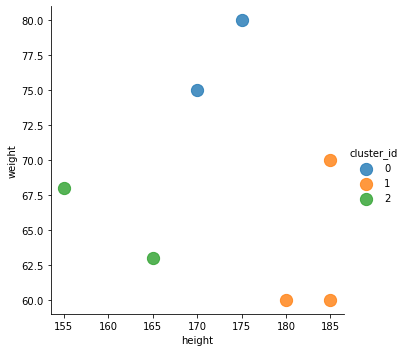

In [19]:
# 시각화
sns.lmplot(
    'height',
    'weight',
    data=df,
    fit_reg=False,
    scatter_kws={'s':150},
    hue='cluster_id'
)

sns.lmplot(
    kmeans.cluster_centers_[0],
    
)

plt.show()

---
### IRIS 군집화 비교

In [21]:
iris = pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# Names을 숫자로 변환하기


iris['label'] = iris['Name'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.label.unique()

array([0, 1, 2])

In [25]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


### k-Means 군집화

In [27]:
iris2 = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
data_points = iris2.values
kmeans = KMeans(n_clusters=3).fit(data_points)

In [35]:
# 중심점 확인
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [37]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [39]:
iris['cluster_id'] = kmeans.labels_
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1


# 시각화 해보기
cluster id의 일련번호가 틀리게 나올 수 있으므로 시각화를 통한 확인이 필요


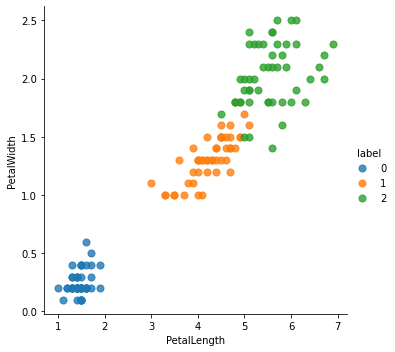

In [48]:
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data =iris,
    hue='label',
    fit_reg=False,
    scatter_kws={'s':50}
)
plt.show()

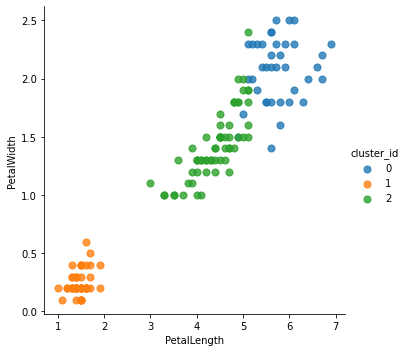

In [59]:
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data =iris,
    hue='cluster_id',
    fit_reg=False,
    scatter_kws={'s':50}
)
plt.show()

In [50]:
# cluster_id : 0 -> 2, 1 -> 0 , 2 -> 1

iris['newcluster']= iris['cluster_id'].map({0:2,1:0,2:1})


In [52]:
iris['newcluster'].value_counts()

1    62
0    50
2    38
Name: newcluster, dtype: int64

In [53]:
iris['cluster_id'].value_counts()

2    62
1    50
0    38
Name: cluster_id, dtype: int64

In [55]:
iris.rename(columns={'newcluster':'cluster_id2'},inplace=True)

In [57]:
sum(iris['label'] == iris['cluster_id2'])/ len(iris)

0.8933333333333333

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.label, iris.cluster_id2)

0.8933333333333333